In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)
data=pd.read_csv(path+"/Titanic-Dataset.csv")

Path to dataset files: /kaggle/input/titanic-dataset


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#filling the missing values(Age) with median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [8]:
#filling the missing values with U i.e Unknown
#Extract first letter from cabin column and insert it in deck (new column) and then fill nan in deck with U
data['deck']=data['Cabin'].str[0]
data['deck']=data['deck'].fillna('U')

In [9]:
data.drop(['Cabin'], axis=1, inplace=True)

In [10]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
data.duplicated().sum()

np.int64(0)

NO Null and Duplicates values so Data is clean

In [13]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,deck
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,9
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S,U
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,687
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
#converting categorical to numerical values
data['Sex']=data['Sex'].map({'male':0, 'female':1})
data['Embarked']=data['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [15]:
data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


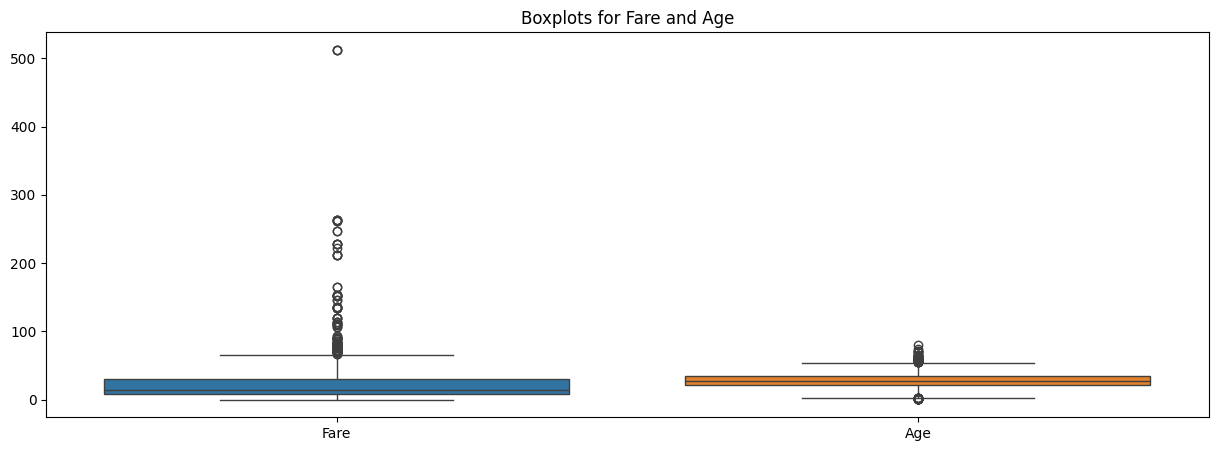

In [16]:
#Check for Outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=data[['Fare', 'Age']])
plt.title('Boxplots for Fare and Age')
plt.show()

In [17]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


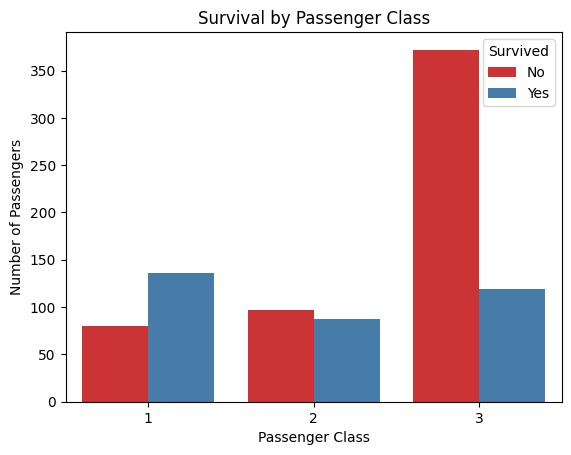

In [48]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set1')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

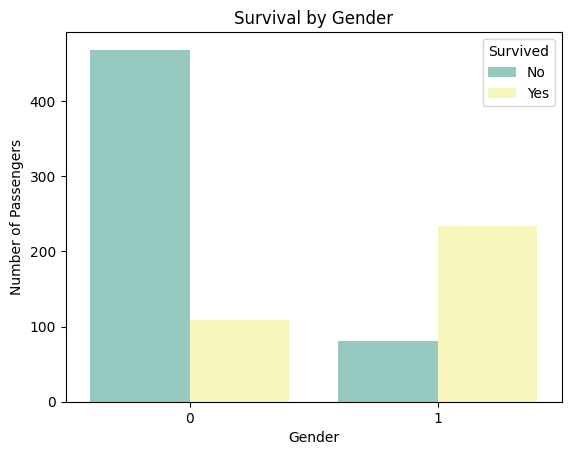

In [34]:
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set3')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

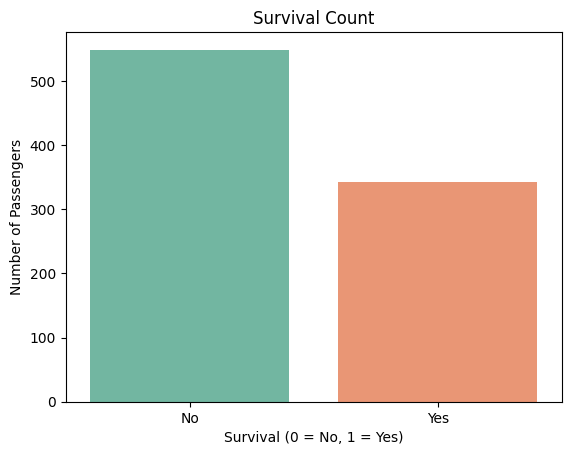

In [49]:
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title("Survival Count")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Summary:
The overall survival rate is lower than the non-survival rate.
Most survivors were from Class 1, followed by Class 3 and Class 2. In contrast, the highest number of non-survivors were from Class 3, then Class 2, and Class 1.
By gender, nearly 250 females survived while fewer than 100 did not. For males, over 400 did not survive, and between 100 to 140 survived.